In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
from glob import glob

import numpy as np
import pandas as pd

import settings as conf
import metadata

# Figures path

In [3]:
figures_path = os.path.join(conf.DELIVERABLES_DIR, 'figures')
os.makedirs(figures_path, exist_ok=True)

# Load gene mappings

In [4]:
with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-0.pkl'), 'rb') as f:
    genes_mapping_0 = pickle.load(f)

with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-1.pkl'), 'rb') as f:
    genes_mapping_1 = pickle.load(f)

# Load S-MultiXcan results

In [5]:
spredixcan_genes_associations_filename = os.path.join(conf.GENE_ASSOC_DIR, 'smultixcan-mashr-pvalues.pkl.xz')
display(spredixcan_genes_associations_filename)

spredixcan_genes_associations = pd.read_pickle(spredixcan_genes_associations_filename)

'/mnt/phenomexcan_base/gene_assoc/smultixcan-mashr-pvalues.pkl.xz'

In [6]:
spredixcan_genes_associations.shape

(22515, 4091)

In [7]:
spredixcan_genes_associations.head(5)

,20096_1-Size_of_red_wine_glass_drunk_small_125ml,2345-Ever_had_bowel_cancer_screening,N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,100011_raw-Iron,5221-Index_of_best_refractometry_result_right,20003_1141150624-Treatmentmedication_code_zomig_25mg_tablet,S69-Diagnoses_main_ICD10_S69_Other_and_unspecified_injuries_of_wrist_and_hand,20024_1136-Job_code_deduced_Information_and_communication_technology_managers,20002_1385-Noncancer_illness_code_selfreported_allergy_or_anaphylactic_reaction_to_food,G6_SLEEPAPNO-Sleep_apnoea,...,Astle_et_al_2016_Sum_basophil_neutrophil_counts,RA_OKADA_TRANS_ETHNIC,pgc.scz2,PGC_ADHD_EUR_2017,MAGIC_FastingGlucose,Astle_et_al_2016_Red_blood_cell_count,SSGAC_Depressive_Symptoms,BCAC_ER_positive_BreastCancer_EUR,IBD.EUR.Inflammatory_Bowel_Disease,Astle_et_al_2016_High_light_scatter_reticulocyte_count
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,0.865429,0.918314,0.810683,0.374671,0.189032,0.140981,0.467741,0.129427,0.193680,0.285479,...,0.416210,0.782554,0.609467,0.980281,0.666504,0.409761,0.713310,0.168319,0.460244,0.765506
ENSG00000000457,0.174192,0.064765,0.889194,0.896938,0.448596,0.269602,0.540261,0.068405,0.041813,0.313427,...,0.149360,0.512603,0.010907,0.228982,0.607081,0.812484,0.678749,0.918971,0.311187,0.344574
ENSG00000000460,0.879969,0.240715,0.238228,0.567555,0.921320,0.825036,0.782230,0.644525,0.392273,0.840014,...,0.503520,0.764147,0.587969,0.301460,0.629621,0.486664,0.736509,0.933600,0.000477,0.321223
ENSG00000000938,0.192670,0.400054,0.114353,0.470700,0.889202,0.000011,0.899764,0.212352,0.829671,0.372348,...,0.899212,0.961678,0.059247,0.588855,0.898525,0.135045,0.954998,0.088220,0.176497,0.304281
ENSG00000000971,0.180632,0.793060,0.490585,0.088752,0.744531,0.949639,0.253817,0.377408,0.971655,0.070266,...,0.390618,0.093824,0.020391,0.109883,0.870551,0.995450,0.002660,0.421588,0.656851,0.868416


# Tissues

In [8]:
with open(conf.FASTENLOC_GTEX_TISSUES_FILE, 'r') as f:
    FASTENLOC_TISSUES_NAMES = set([x.strip() for x in f.readlines()])

In [9]:
assert len(FASTENLOC_TISSUES_NAMES) == 49

In [10]:
FASTENLOC_TISSUES_NAMES

{'Adipose_Subcutaneous',
 'Adipose_Visceral_Omentum',
 'Adrenal_Gland',
 'Artery_Aorta',
 'Artery_Coronary',
 'Artery_Tibial',
 'Brain_Amygdala',
 'Brain_Anterior_cingulate_cortex_BA24',
 'Brain_Caudate_basal_ganglia',
 'Brain_Cerebellar_Hemisphere',
 'Brain_Cerebellum',
 'Brain_Cortex',
 'Brain_Frontal_Cortex_BA9',
 'Brain_Hippocampus',
 'Brain_Hypothalamus',
 'Brain_Nucleus_accumbens_basal_ganglia',
 'Brain_Putamen_basal_ganglia',
 'Brain_Spinal_cord_cervical_c-1',
 'Brain_Substantia_nigra',
 'Breast_Mammary_Tissue',
 'Cells_Cultured_fibroblasts',
 'Cells_EBV-transformed_lymphocytes',
 'Colon_Sigmoid',
 'Colon_Transverse',
 'Esophagus_Gastroesophageal_Junction',
 'Esophagus_Mucosa',
 'Esophagus_Muscularis',
 'Heart_Atrial_Appendage',
 'Heart_Left_Ventricle',
 'Kidney_Cortex',
 'Liver',
 'Lung',
 'Minor_Salivary_Gland',
 'Muscle_Skeletal',
 'Nerve_Tibial',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'Skin_Not_Sun_Exposed',
 'Skin_Sun_Exposed',
 'Small_Intestine_Terminal_Ileum',

# Functions

In [11]:
from glob import glob

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plots

In [13]:
def create_df_plot(fastenloc_results, enloc_results):
    fastenloc_results = fastenloc_results.unstack()
    enloc_results = enloc_results.unstack()
    
    common_index = fastenloc_results.index.intersection(enloc_results.index)
    
    df = pd.DataFrame(data={'ENLOC': enloc_results, 'fastENLOC': fastenloc_results}, index=common_index)
    
    return df.dropna()

## Read ENLOC data

In [14]:
ENLOC_RUNS_DIR = os.path.join(conf.MISC_RESULTS_BASE_DIR, 'enloc-selected_traits')

In [15]:
def read_enloc(phenotype, tissue):
    enloc_filename = f'{phenotype}__PM__{tissue}.enloc.rst.gz'
    enloc_result_path = os.path.join(ENLOC_RUNS_DIR, phenotype, enloc_filename)
    
    enloc_result = pd.read_csv(enloc_result_path, sep='\s+')
    enloc_result = enloc_result.assign(gene_id=enloc_result['molecular_qtl_trait'].apply(lambda x: x.split('.')[0]))
    
    return enloc_result.groupby('gene_id')['locus_rcp'].max().rename(tissue)

def read_enloc_all_tissues(phenotype_code):
    all_tissues_data = {}
    for tissue in FASTENLOC_TISSUES_NAMES:
        if tissue.startswith('Skin_'):
            continue
        all_tissues_data[tissue] = read_enloc(phenotype_code, tissue)
    
    return pd.DataFrame(all_tissues_data)

## Read fastENLOC data

In [16]:
FASTENLOC_DIR = conf.FASTENLOC_RESULTS_DIR['RapidGWASProject']

In [17]:
def read_fe(phenotype_code, tissue, rename_genes=False):
    filename = f'fastenloc-{phenotype_code}-{tissue}.enloc.sig.out'
    filepath = os.path.join(FASTENLOC_DIR, phenotype_code, filename)
    
    fe_data = pd.read_csv(filepath, sep='\s+', usecols=[0, 5], header=None).rename(columns={0: 'gene_cluster', 5: 'rcp'})
    fe_data = fe_data = fe_data.assign(gene=fe_data['gene_cluster'].apply(lambda x: x.split(':')[0])) 
    fe_data = fe_data.assign(gene_cluster=fe_data['gene_cluster'].apply(lambda x: x.split(':')[1]))
    
    # FIXME: is it correct to sum across clusters of a gene? or pick max? Haky thinks summing is fine.
    fe_max = fe_data.groupby('gene')['rcp'].sum()
    #fe_max = fe_max.loc[fe_max.index.intersection(all_gene_ids)]
    if rename_genes:
        fe_max = fe_max.rename(index=genes_mapping_0)
    
    return fe_max.rename(tissue)

def read_fe_all_tissues(phenotype_code, rename_genes=False):
    all_tissues_data = {}
    for tissue in FASTENLOC_TISSUES_NAMES:
        if tissue.startswith('Skin_'):
            continue
        all_tissues_data[tissue] = read_fe(phenotype_code, tissue, rename_genes)
    
    return pd.DataFrame(all_tissues_data)

def read_pheno(pheno, df): 
    _tmp = df[df['pheno'] == pheno] 
    if _tmp.shape[0] == 0: 
        return None 
     
    _res = {} 
    _all_genes = set() 
    for idx, _data in _tmp.iterrows(): 
        #print(_data.tissue) 
         
        tissue_data = read_fe(_data.file) 
        _res[_data.tissue] = tissue_data 
        _all_genes.update(tissue_data.index) 
    
    return pd.DataFrame(_res, index=_all_genes).fillna(-1).max(axis=1)

In [18]:
# create summary of files
_path = os.path.join(conf.FASTENLOC_RESULTS_DIR['RapidGWASProject'], '**/*.enloc.sig.out')
display(_path)
all_fastenloc_results_files = glob(_path)

'/mnt/phenomexcan_base/results/fastenloc/rapid_gwas_project/**/*.enloc.sig.out'

In [19]:
len(all_fastenloc_results_files)

198401

In [20]:
PHENO_CODES = set(metadata.RAPID_GWAS_PHENO_INFO.index)

In [21]:
len(PHENO_CODES)

4359

In [22]:
phenos = []
tissues = []

for f in all_fastenloc_results_files:
    f = os.path.basename(f)
    split = f.split('-')
    
    tiss = split[-1].split('.')[0]
    if tiss not in FASTENLOC_TISSUES_NAMES:
        tiss = '-'.join(split[-2:]).split('.')[0]
    
    phen = split[1]
    if phen not in PHENO_CODES:
        phen = '-'.join(split[1:3])
    
    phenos.append(phen)
    tissues.append(tiss)

results_summary = pd.DataFrame({'pheno': phenos, 'tissue': tissues, 'file': all_fastenloc_results_files})

In [23]:
results_summary.shape

(198401, 3)

In [24]:
results_summary.head()

,pheno,tissue,file
0,22617_9219,Brain_Spinal_cord_cervical_c-1,/mnt/phenomexcan_base/results/fastenloc/rapid_...
1,22617_9219,Artery_Coronary,/mnt/phenomexcan_base/results/fastenloc/rapid_...
2,22617_9219,Brain_Cortex,/mnt/phenomexcan_base/results/fastenloc/rapid_...
3,22617_9219,Brain_Substantia_nigra,/mnt/phenomexcan_base/results/fastenloc/rapid_...
4,22617_9219,Breast_Mammary_Tissue,/mnt/phenomexcan_base/results/fastenloc/rapid_...


In [25]:
results_summary['pheno'].unique().shape

(4049,)

In [26]:
np.all([t in PHENO_CODES for t in results_summary['pheno'].unique()])

True

In [27]:
results_summary['tissue'].unique().shape

(49,)

In [28]:
np.all([t in FASTENLOC_TISSUES_NAMES for t in results_summary['tissue'].unique()])

True

In [29]:
_all_tissues_in_results = results_summary['tissue'].unique()
np.all([t in _all_tissues_in_results for t in FASTENLOC_TISSUES_NAMES])

True

## All RCPs across all tissues for particular phenotypes

In [30]:
spredixcan_genes_associations.columns[spredixcan_genes_associations.columns.str.lower().str.contains('6152_9')]

Index(['6152_9-Blood_clot_DVT_bronchitis_emphysema_asthma_rhinitis_eczema_allergy_diagnosed_by_doctor_Hayfever_allergic_rhinitis_or_eczema'], dtype='object')

In [31]:
PHENO_MAPPINGS = {
    '50_raw': 'UKB_50_Standing_height',
    '1160': 'UKB_1160_Sleep_duration',
    '6152_9': 'UKB_6152_9_diagnosed_by_doctor_Hayfever_allergic_rhinitis_or_eczema',
    '20016_raw': 'UKB_20016_Fluid_intelligence_score',
}

## Height: 50_raw

In [32]:
PHENOTYPE_SELECTED = '50_raw'

In [33]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [34]:
fe_all.shape

(16933, 47)

In [35]:
fe_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000000419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000129,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000457,0.003131,0.000210,0.000861,0.000434,0.000285,0.001137,0.001918,0.000792,0.001738,0.002506,...,0.000710,0.000635,0.000240,0.000562,0.000716,0.002703,0.001549,0.001597,0.002480,0.001366
ENSG00000000460,0.000449,0.001353,0.001389,0.000649,0.000801,NaN,0.002268,0.000809,0.003556,0.001993,...,0.001404,NaN,0.006656,0.002724,NaN,0.001098,0.000669,0.000730,0.000164,0.000259
ENSG00000000971,0.000831,0.001568,0.000528,0.001338,0.002003,0.004728,0.001127,0.000219,0.001366,0.001651,...,0.003273,0.000222,0.000293,0.000508,0.001930,0.002941,0.001548,0.001987,NaN,0.000476
ENSG00000001084,0.000867,0.001428,0.000278,0.000190,0.000646,0.021987,0.022065,0.005988,0.001571,NaN,...,0.000182,0.001844,0.027400,0.002551,NaN,0.001503,0.000568,0.000267,NaN,0.037030


In [36]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [37]:
enloc_all.shape

(22709, 47)

In [38]:
enloc_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000457,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ENSG00000000460,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
ENSG00000000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000971,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0


In [39]:
df = create_df_plot(fe_all, enloc_all)

In [40]:
df.shape

(141345, 2)

In [41]:
df.head()

,,ENLOC,fastENLOC
Nerve_Tibial,ENSG00000166750,0.001,0.001945
Cells_EBV-transformed_lymphocytes,ENSG00000106829,0.001,0.000179
Adipose_Visceral_Omentum,ENSG00000115423,0.000,0.000466
Esophagus_Mucosa,ENSG00000163491,0.000,0.000273
Adipose_Visceral_Omentum,ENSG00000134222,0.329,0.648300


In [42]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [43]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.6923556568118308, 0.0)

In [44]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.6118349222130194, pvalue=0.0)

In [45]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

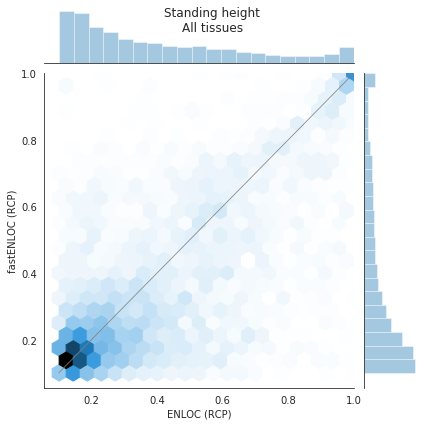

In [46]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'{metadata.RAPID_GWAS_PHENO_INFO.loc[PHENOTYPE_SELECTED, "description"]}\nAll tissues')

    fig_path = os.path.join(figures_path, 'sup_fig3a.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')

## Sleep duration: 1160

In [47]:
PHENOTYPE_SELECTED = '1160'

In [48]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [49]:
fe_all.shape

(34239, 47)

In [50]:
fe_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000000419,0.000131,NaN,NaN,0.000341,NaN,NaN,NaN,NaN,0.004650,NaN,...,NaN,NaN,NaN,0.000659,NaN,0.000493,0.000239,NaN,0.000386,NaN
ENSG00000000457,0.003401,NaN,0.001552,0.001055,0.000185,0.001060,0.000551,NaN,0.005782,0.003712,...,0.000885,0.000483,0.000102,0.005350,0.000224,0.003944,0.003282,0.001741,0.002240,0.001786
ENSG00000000460,0.000707,0.001512,0.001822,0.000768,0.001315,NaN,0.000623,NaN,0.005261,0.002649,...,0.001980,NaN,0.001399,0.005030,NaN,0.001627,0.001700,0.000925,0.000320,0.000381
ENSG00000000938,0.001197,0.000341,0.000201,NaN,NaN,0.000116,0.000883,NaN,0.000119,0.001402,...,NaN,0.000595,NaN,0.000530,NaN,0.001207,NaN,NaN,0.000267,0.001031
ENSG00000000971,0.001451,0.001164,0.000423,0.002146,0.003730,0.005971,0.000993,NaN,0.003973,0.001584,...,0.006074,0.000365,0.002096,0.002467,0.002984,0.004090,0.004169,0.002015,NaN,0.000875


In [51]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [52]:
enloc_all.shape

(3893, 47)

In [53]:
enloc_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000001084,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000001167,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000001626,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0
ENSG00000002549,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000002745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [54]:
df = create_df_plot(fe_all, enloc_all)

In [55]:
df.shape

(40020, 2)

In [56]:
df.head()

,,ENLOC,fastENLOC
Uterus,ENSG00000166595,0.000,0.001272
Minor_Salivary_Gland,ENSG00000105509,0.000,0.000596
Cells_Cultured_fibroblasts,ENSG00000124641,0.013,0.012400
Brain_Cerebellum,ENSG00000168434,0.000,0.000219
Esophagus_Gastroesophageal_Junction,ENSG00000142534,0.309,0.520070


In [57]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [58]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.5621062305250905, 3.035618446102388e-42)

In [59]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.5154711770354803, pvalue=1.11430091879732e-34)

In [60]:
# with sns.axes_style("white"):
#     ax = sns.jointplot(data=df_plot, x='ENLOC', y='fastENLOC', kind='kde')
#     ax.ax_joint.plot([0.0, 1.0], [0.0, 1.0], 'gray', linewidth=0.75)
#     ax.ax_joint.set_xlim([0.0, 1.10])
#     ax.ax_joint.set_ylim([0.0, 1.10])

In [61]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

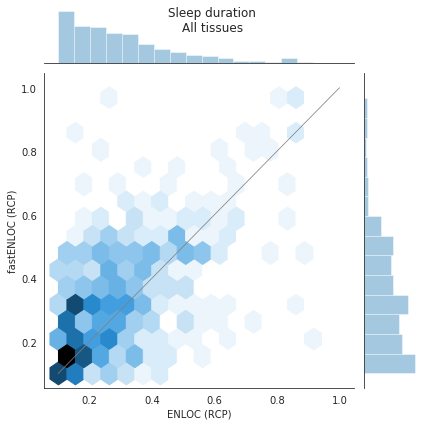

In [62]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'{metadata.RAPID_GWAS_PHENO_INFO.loc[PHENOTYPE_SELECTED, "description"]}\nAll tissues')
    
    fig_path = os.path.join(figures_path, 'sup_fig3b.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')

## Ezcema: 6152_9

In [63]:
PHENOTYPE_SELECTED = '6152_9'

In [64]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [65]:
fe_all.shape

(31205, 47)

In [66]:
fe_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000000457,0.005030,0.000425,0.003099,0.000801,0.000215,0.005822,0.000603,0.000664,0.005344,0.003691,...,0.000221,0.001180,NaN,0.001972,0.000421,0.003383,0.002047,0.001639,0.004471,0.001738
ENSG00000000460,0.002391,0.008182,0.003843,0.001554,0.003003,NaN,0.000564,0.001061,0.006647,0.009640,...,0.001158,NaN,0.000382,0.007553,0.000101,0.004335,0.000896,0.000565,0.000239,0.000319
ENSG00000000938,0.000948,0.000340,0.000247,NaN,NaN,NaN,0.000887,NaN,NaN,0.000858,...,NaN,0.000271,NaN,0.000174,NaN,0.000649,NaN,NaN,0.000210,0.000632
ENSG00000000971,0.000713,0.000460,NaN,0.009512,0.000693,0.000342,0.000195,NaN,0.006482,0.000404,...,0.002607,NaN,0.000505,0.006987,0.000827,0.000857,0.011500,0.000407,NaN,0.001412
ENSG00000001036,0.000486,0.000109,0.008005,NaN,0.000304,0.002029,0.004197,NaN,NaN,0.013456,...,NaN,0.000387,NaN,0.000779,0.000171,NaN,0.000127,NaN,NaN,0.001522


In [67]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [68]:
enloc_all.shape

(8552, 47)

In [69]:
enloc_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000000419,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00
ENSG00000000457,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,0.000,0.000,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN
ENSG00000000460,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,0.00
ENSG00000000938,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00
ENSG00000000971,0.071,0.002,0.001,0.022,0.018,0.0,0.002,0.005,0.027,0.001,...,0.004,0.001,0.0,0.005,0.008,0.004,0.022,0.006,0.001,0.01


In [70]:
df = create_df_plot(fe_all, enloc_all)

In [71]:
df.shape

(70536, 2)

In [72]:
df.head()

,,ENLOC,fastENLOC
Brain_Frontal_Cortex_BA9,ENSG00000168928,0.000,0.000159
Adipose_Visceral_Omentum,ENSG00000197536,0.008,0.000752
Esophagus_Gastroesophageal_Junction,ENSG00000165271,0.001,0.001710
Testis,ENSG00000213658,0.002,0.000288
Esophagus_Muscularis,ENSG00000120437,0.000,0.000117


In [73]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [74]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.6483029250444933, 5.4944137447535363e-163)

In [75]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.5716791060538983, pvalue=7.585856504677343e-119)

In [76]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

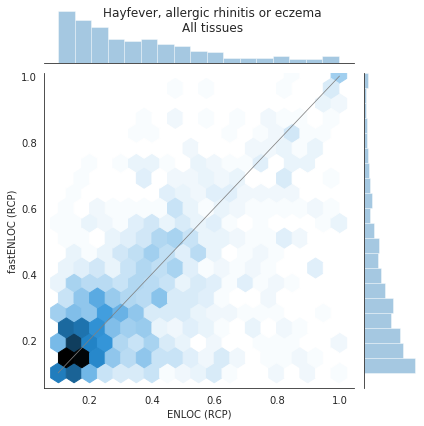

In [77]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'Hayfever, allergic rhinitis or eczema\nAll tissues')
    
    fig_path = os.path.join(figures_path, 'sup_fig3c.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')

## Fluid intelligence score: 20016

In [78]:
PHENOTYPE_SELECTED = '20016_raw'

In [79]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [80]:
fe_all.shape

(35471, 47)

In [81]:
fe_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000000419,0.000205,0.000350,NaN,0.000405,NaN,0.000318,0.000148,0.000112,0.002264,NaN,...,NaN,NaN,NaN,0.000243,NaN,0.000705,NaN,NaN,0.000441,NaN
ENSG00000000457,0.004956,0.000306,0.002659,0.001481,0.000274,0.003534,0.001798,0.000837,0.009823,0.004721,...,0.001492,0.000822,0.000340,0.003636,0.000645,0.005143,0.002466,0.003265,0.004666,0.001886
ENSG00000000460,0.002040,0.005612,0.005046,0.003706,0.003235,0.000610,0.002142,0.002302,0.013306,0.007665,...,0.004747,0.000129,0.002854,0.011755,0.000186,0.006391,0.002081,0.001938,0.000623,0.000894
ENSG00000000938,0.000482,0.000160,NaN,NaN,NaN,NaN,0.000592,NaN,NaN,0.000548,...,NaN,0.000161,NaN,0.000189,NaN,0.000567,NaN,NaN,0.000113,0.000211
ENSG00000000971,0.002207,0.002046,0.000654,0.005555,0.005023,0.005292,0.002908,0.000210,0.007964,0.002623,...,0.014430,0.001164,0.001371,0.004830,0.004156,0.020676,0.005993,0.004357,NaN,0.001016


In [82]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [83]:
enloc_all.shape

(4776, 47)

In [84]:
enloc_all.head()

,Adipose_Subcutaneous,Lung,Whole_Blood,Brain_Hippocampus,Heart_Atrial_Appendage,Cells_Cultured_fibroblasts,Testis,Small_Intestine_Terminal_Ileum,Brain_Cerebellum,Esophagus_Muscularis,...,Ovary,Stomach,Liver,Brain_Cerebellar_Hemisphere,Artery_Coronary,Nerve_Tibial,Brain_Cortex,Brain_Putamen_basal_ganglia,Brain_Hypothalamus,Breast_Mammary_Tissue
ENSG00000000419,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
ENSG00000000457,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ENSG00000000460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000938,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
ENSG00000001617,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,...,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0


In [85]:
df = create_df_plot(fe_all, enloc_all)

In [86]:
df.shape

(68915, 2)

In [87]:
df.head()

,,ENLOC,fastENLOC
Brain_Anterior_cingulate_cortex_BA24,ENSG00000204305,0.000,0.000411
Brain_Amygdala,ENSG00000101146,0.000,0.000539
Adipose_Visceral_Omentum,ENSG00000115423,0.009,0.005764
Brain_Spinal_cord_cervical_c-1,ENSG00000053254,0.002,0.000207
Artery_Tibial,ENSG00000086991,0.000,0.000249


In [88]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [89]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.7218577087211789, 6.494489366379225e-258)

In [90]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.6479844086761167, pvalue=2.6196927434994354e-191)

In [91]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

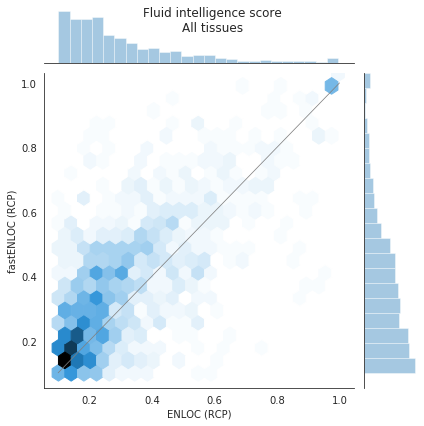

In [92]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'{metadata.RAPID_GWAS_PHENO_INFO.loc[PHENOTYPE_SELECTED, "description"]}\nAll tissues')
    
    fig_path = os.path.join(figures_path, 'sup_fig3d.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')